# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [19]:
# Checking the number of mice.
unique_mice_count = combined_data['Mouse ID'].nunique()
print(unique_mice_count)







249


In [20]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()
print(repr(duplicate_mouse_ids))




array(['g989'], dtype=object)


In [21]:
# Optional: Get all the data for the duplicate mouse ID.
# duplicate_mouse_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse_ids)]
# print(duplicate_mouse_data[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']].to_string(index=False))
# duplicate_mouse_data
duplicate_mouse_g989 = combined_data[combined_data['Mouse ID'] == 'g989']
duplicate_mouse_g989


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [22]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# cleaned_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse_ids)]
# updated_unique_mice_count = cleaned_data['Mouse ID'].nunique()
# print(f"number of unique mice IDs after cleaning: {updated_unique_mice_count}")
combined_data_cleaned = combined_data[combined_data['Mouse ID'] != 'g989']
combined_data_cleaned.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [23]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count_cleaned = combined_data_cleaned['Mouse ID'].nunique()
unique_mice_count_cleaned 

248

## Summary Statistics

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_regimen = combined_data_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)']
mean = tumor_regimen.mean()
median = tumor_regimen.median()
var = tumor_regimen.var()
std = tumor_regimen.std()
sem = tumor_regimen.sem()
sem

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({
    'Mean Tumor Volume': mean,
    'Median Tumor Volume': median,
    'Tumor Volume Variance': var,
    'Tumor Volume Standard Diviation': std,
    'Tumor Volume Sem': sem 
})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Diviation,Tumor Volume Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [25]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_new = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats_new


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

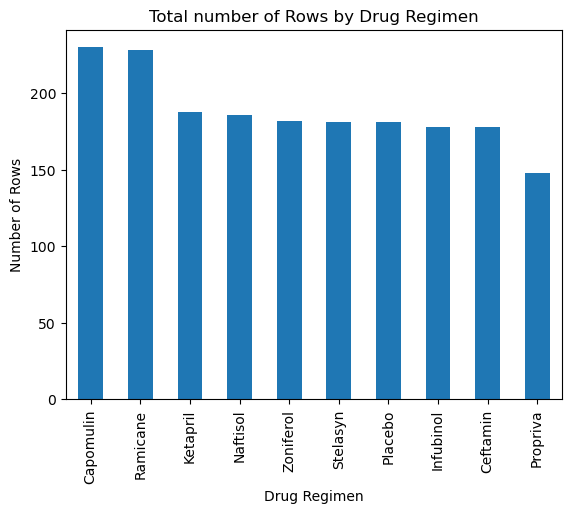

In [26]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = combined_data_cleaned['Drug Regimen'].value_counts()

drug_regimen_counts.plot(kind='bar')
plt.title('Total number of Rows by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

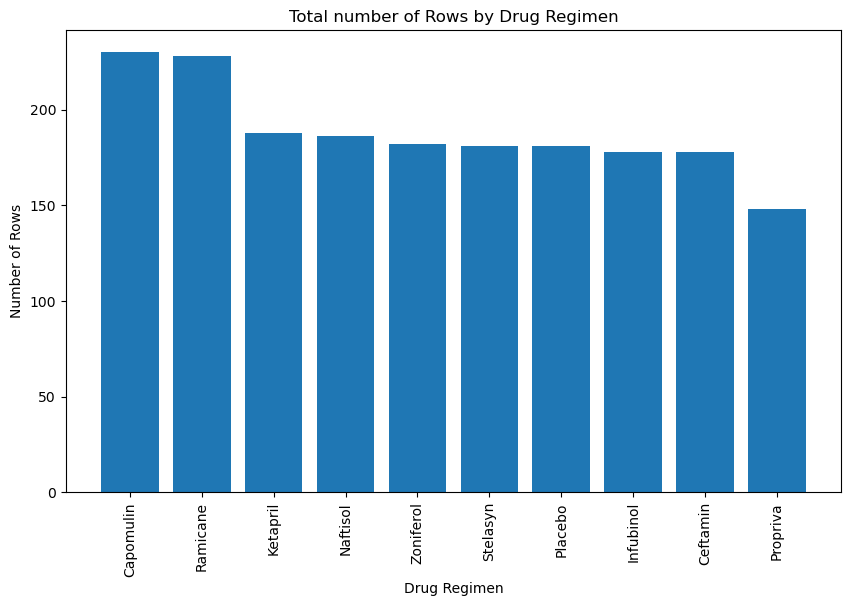

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# drug_regimen_counts = combined_data_cleaned.groupby('Drug Regimen').size()
drug_regimen_counts.sort_values(ascending=False)
plt.figure(figsize=(10,6))
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values)

plt.title('Total number of Rows by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation = 'vertical')

plt.show

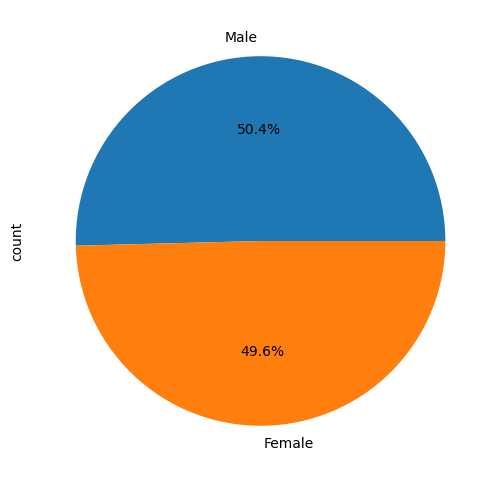

In [28]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
sex_counts = combined_data_cleaned.groupby('Mouse ID')['Sex'].first().value_counts()
# Get the unique mice with their gender
sex_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), legend=False)

plt.show()
# Make the pie chart


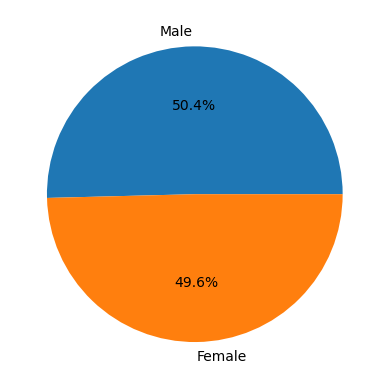

In [29]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%')
plt.show()

# Make the pie chart


## Quartiles, Outliers and Boxplots

In [30]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoints = combined_data_cleaned.groupby('Mouse ID')['Timepoint'].max()
last_timepoints_df = pd.merge(last_timepoints, combined_data_cleaned, on=['Mouse ID', 'Timepoint'])
final_tumor_data = last_timepoints_df[last_timepoints_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
final_tumor_data[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)', 'Timepoint']]


,Mouse ID,Drug Regimen,Tumor Volume (mm3),Timepoint
0,a203,Infubinol,67.973419,45
1,a251,Infubinol,65.525743,45
3,a275,Ceftamin,62.999356,45
6,a411,Ramicane,38.407618,45
7,a444,Ramicane,43.047543,45
...,...,...,...,...
238,y769,Ceftamin,68.594745,45
239,y793,Capomulin,31.896238,45
240,y865,Ceftamin,64.729837,45
244,z578,Ramicane,30.638696,45


In [31]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes_data=[]


# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:

# Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_data.loc[final_tumor_data["Drug Regimen"] == treatment,'Tumor Volume (mm3)']

    tumor_volumes_data.append(tumor_volumes)

    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])

    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]

    print(f"{treatment}'s potential outliers: {outliers}")

 # Define quartiles and IQR

    # Determine outliers using upper and lower bounds


    

# print(f"{treatment}'s potential outliers:")
# print(outliers)
# print("-" * 50)


   





Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\19702\AppData\Local\Temp\ipykernel_21764\3115411575.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(tumor_volumes_data, vert=True, patch_artist=True, labels=treatments)


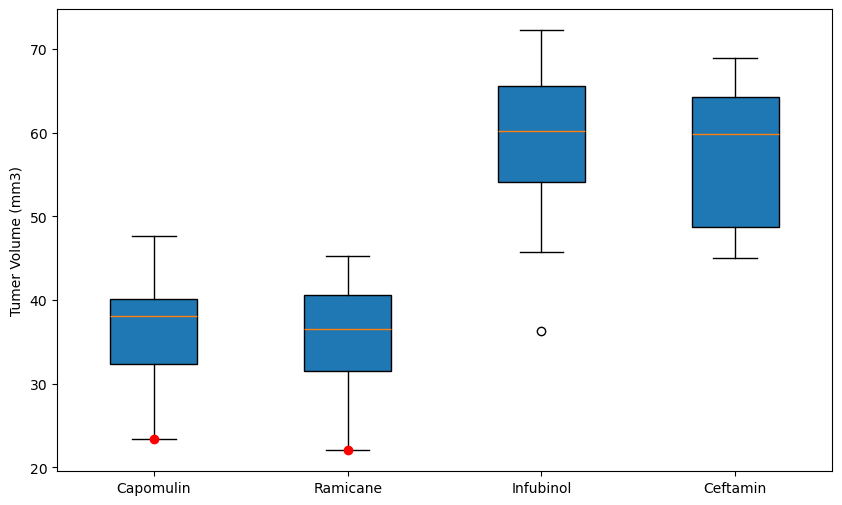

In [32]:
# # Generate a box plot that shows the distribution of the tumor volume for each treatment group.
# # combined_data_cleaned['Tumor Volume (mm3)'] = pd.to_numeric(combined_data_cleaned['Tumor Volume (mm3)'], errors= 'coerce')
# treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# filtered_data = final_tumor_data[final_tumor_data['Drug Regimen'].isin(treatments)]

# final_tumor_data.boxplot(column='Tumor Volume (mm3)', by ='Drug Regimen', grid=False)
# # plt.boxplot(filtered_data)
# plt.tight_layout()
# plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(tumor_volumes_data, vert=True, patch_artist=True, labels=treatments)

# ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumer Volume (mm3)')
ax.grid(False)

for treatment, volumes in zip(treatments, tumor_volumes_data):
    treatment_outliers = volumes[(volumes < lower_bound) |  (volumes > upper_bound)]
    ax.plot([treatments.index(treatment) + 1] * len(treatment_outliers), treatment_outliers, 'ro')

plt.show()


## Line and Scatter Plots

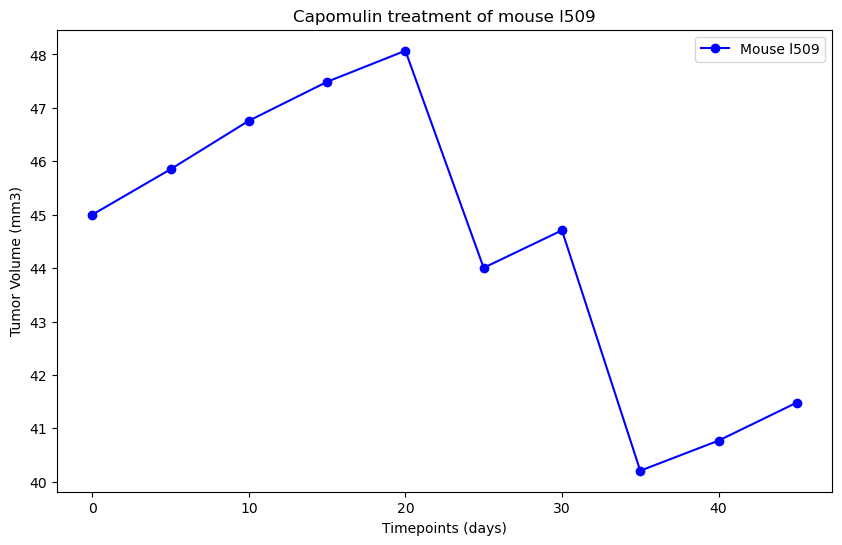

In [33]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse_data = combined_data_cleaned.loc[(combined_data_cleaned['Drug Regimen'] == 'Capomulin'), :]
mouse_id = 'l509'
mousedata = capomulin_mouse_data.loc[(capomulin_mouse_data['Mouse ID'] == mouse_id)]

plt.figure(figsize=(10, 6))
plt.plot(mousedata['Timepoint'],  # Use mousedata instead of capomulin_mouse_data
         mousedata['Tumor Volume (mm3)'],
         marker='o',
         linestyle='-',
         color='b',
         label=f'Mouse {mouse_id}')

plt.title(f'Capomulin treatment of mouse {mouse_id}')
plt.xlabel('Timepoints (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()

plt.show()

# capomulin_mouse_data = combined_data_cleaned.loc[(combined_data_cleaned['Drug Regimen'] == 'Capomulin'), :]
# mouse_id='l509'
# mousedata = capomulin_mouse_data.loc[(capomulin_mouse_data['Mouse ID'] == mouse_id)]


# plt.figure(figsize=(10, 6))
# plt.plot(capomulin_mouse_data['Timepoint'],
#          capomulin_mouse_data['Tumor Volume (mm3)'],
#          marker='o',
#          linestyle='-',
#          color='b',
#          label=f'Mouse {mouse_id}')

        

# plt.title(f'Capomulin treatment of mouse {mouse_id}')
# plt.xlabel('Timepoints (days)')
# plt.ylabel('Tumor Volume (mm3)')
# plt.legend()

# plt.show()






# capomulin_mouse_data = combined_data_cleaned.loc[(combined_data_cleaned['Mouse ID']) & (combined_data_cleaned['Drug Regimen'] == 'Capomulin'),:]
# Check if the filtered data is valid
# if capomulin_mouse_data.empty:
#     print(f"No data found for mouse {mouse_id} treated with Capomulin.")
# else:
#     print(f"Filtered data for mouse {mouse_id}:\n{capomulin_mouse_data}")

# plt.figure(figsize=(10, 6))
# plt.plot(capomulin_data['Mouse ID'], capomulin_data['Tumor Volume (mm3)'], capomulin_data['Timepoint'])

# plt.title('Capomulin treatment of mouse 1509')
# plt.xlabel('Timepoints (days)')
# plt.ylabel('Tumor Volume (mm3)')

# plt.show

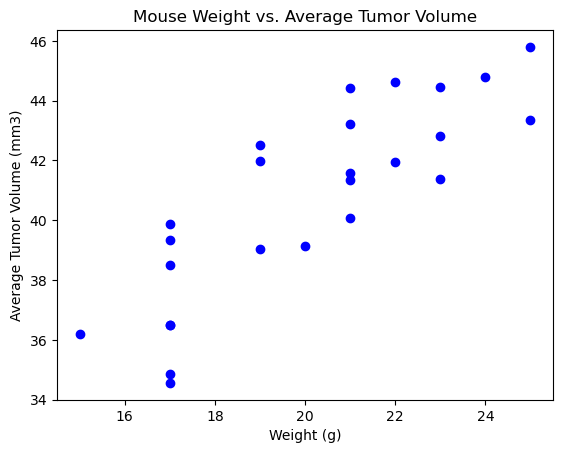

In [34]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# capomulin_data = combined_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
# mouse_weight = combined_data.groupby('Mouse ID')['Weight (g)'].first()

# scatter_data = pd.combined_data({
#     'Average Tumer Volume (mm3)': tumor_volumes,
#     'Mouse weight (g)' : mouse_weight 
# }).dropna()
# plt.scatter(scatter_data['Mouse Weight (g)'], scatter_data['Average Tumor Volume (mm3)'], color='b')
# plt.xlabel('Mouse Weight (g)')
# plt.ylabel('Average Tumor Volume (mm3)')
# plt.show()

# capomulin_data = combined_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
# mouse_weight = combined_data.groupby('Mouse ID')['Weight (g)'].first()

# scatter_data = pd.DataFrame({
#     'Average Tumor Volume (mm3)': capomulin_data,
#     'Mouse Weight (g)': mouse_weight 
# }).dropna()

# plt.scatter(scatter_data['Mouse Weight (g)'], scatter_data['Average Tumor Volume (mm3)'], color='b')
# plt.xlabel('Mouse Weight (g)')
# plt.ylabel('Average Tumor Volume (mm3)')
# plt.show()

grouped_capomulin = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin"]
capomulin_average = grouped_capomulin.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
plt.scatter(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"], color="blue")

plt.title("Mouse Weight vs. Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()




## Correlation and Regression

The correlation between Mouse Weight and the Average Tumor Volume is 0.84


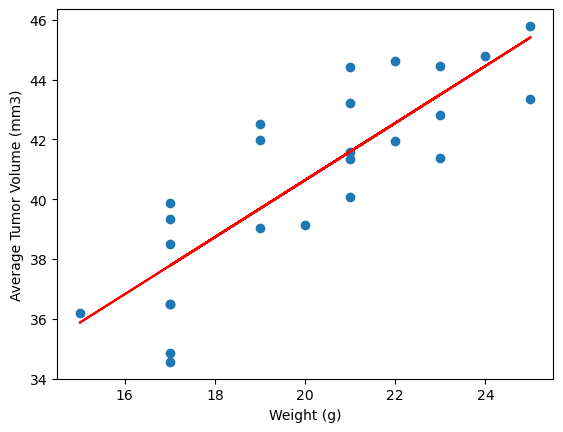

In [36]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = round(st.pearsonr(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between Mouse Weight and the Average Tumor Volume is {correlation}")
model = st.linregress(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])

y_values = capomulin_average['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'],y_values,color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()
